## Logistic Regression Implementation

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Creating Dataset 

In [60]:
from sklearn.datasets import make_classification
## The dataset created from this does not need to be standardized

In [61]:
X,y = make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=42)

In [62]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224
...,...,...,...,...,...,...,...,...,...,...
995,-1.367638,1.462255,-1.154918,-0.290454,-0.413424,0.032396,1.545490,1.428760,1.687092,1.072542
996,-1.514876,-3.221016,-1.300744,0.395599,-0.527994,1.353069,1.777506,-1.680870,1.798510,0.034272
997,1.674633,1.754933,1.586154,0.018402,-1.514470,0.321593,-2.417694,0.692723,-1.503850,0.225264
998,-0.778609,-0.835689,-0.194842,1.097220,0.180071,-0.272933,-0.533188,-0.497354,2.472138,0.867187


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
## Model training 

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [65]:
reg.fit(X_train,y_train)

LogisticRegression()

In [66]:
y_pred = reg.predict(X_test)

In [67]:
## Confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [68]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.83
[[75 14]
 [20 91]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.87      0.82      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



## HYPERPARAMETER TUNNING AND CROSS VALIDATION

In [69]:

model = LogisticRegression()
penalty = ['l2','l1','elasticnet']
c_values = [100,10,1.0,0.1,0,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']

In [70]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split

# Create dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=64)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=64)

# Model
model = LogisticRegression(max_iter=1000)

# Parameter grid
params = [
    {'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']},
    {'penalty': ['l1'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['liblinear', 'saga']},
    {'penalty': ['elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['saga'], 'l1_ratio': [0.5]}
]

# Cross-validation
cv = StratifiedKFold()

# Grid Search CV
grid = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# Fit model
grid.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.9585714285714285


In [71]:
y_pred = grid.predict(X_test)

In [72]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.9633333333333334
[[143   5]
 [  6 146]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       148
           1       0.97      0.96      0.96       152

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



## Randomizes Search CV

In [73]:
from sklearn.model_selection import RandomizedSearchCV
model = LogisticRegression(max_iter=1000)
# Parameter grid
params = [
    {'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']},
    {'penalty': ['l1'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['liblinear', 'saga']},
    {'penalty': ['elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['saga'], 'l1_ratio': [0.5]}
]
rand = RandomizedSearchCV(estimator=model,param_distributions=params,scoring='accuracy',cv =5)

In [74]:
# Create dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=64)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rand.fit(X_train,y_train)
y_pred = rand.predict(X_test)

In [75]:
rand.best_estimator_

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')

In [76]:
rand.best_score_

0.9628571428571429

In [77]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.9633333333333334
[[126   8]
 [  3 163]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       134
           1       0.95      0.98      0.97       166

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



## One Versus Rest (For Multi Classification Problem)

In [78]:
# Create dataset
X, y = make_classification(n_samples=1000, n_features=10,n_informative=3 ,n_classes=3, random_state=15)

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [80]:
reg = LogisticRegression(multi_class='ovr')

reg.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [81]:
y_pred = reg.predict(X_test)

In [82]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.7833333333333333
[[83 16  6]
 [ 2 69 26]
 [ 6  9 83]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       105
           1       0.73      0.71      0.72        97
           2       0.72      0.85      0.78        98

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



In [83]:
# Parameter grid
params = [
    {'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']},
    {'penalty': ['l1'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['liblinear', 'saga']},
    {'penalty': ['elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['saga'], 'l1_ratio': [0.5]}
]
rand = RandomizedSearchCV(estimator=reg,param_distributions=params,scoring='accuracy',cv =5)

In [84]:
import warnings
warnings.filterwarnings('ignore')
rand.fit(X_train,y_train)
y_pred = rand.predict(X_test)

In [85]:
rand.best_estimator_

LogisticRegression(multi_class='ovr', solver='liblinear')

In [86]:
rand.best_score_

0.7957142857142857

In [87]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.7833333333333333
[[83 16  6]
 [ 2 69 26]
 [ 6  9 83]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       105
           1       0.73      0.71      0.72        97
           2       0.72      0.85      0.78        98

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



## Logistic Regression For Imbalanced Dataset

In [88]:
## Generate and plot a synthetic imbalanced classification dataset 
from collections import Counter
from sklearn.datasets import make_classification

In [89]:
## Imbalanced dataset

X,y = make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,
                          n_redundant=0,weights=[0.99],random_state=10)

In [90]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [91]:
Counter(y)

Counter({0: 9846, 1: 154})

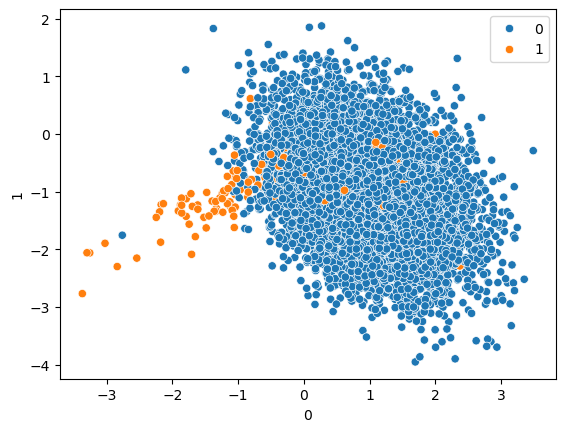

In [92]:
x = pd.DataFrame(X)[0]
yy = pd.DataFrame(X)[1]
sns.scatterplot(x=x,y=yy,hue=y)
plt.show()

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [94]:
## In logistic regression model we have one more parameter known as class weight 

## it is given as balanced when the value of outputs are same i.e no of 0 and 1 are equal

## But since we are using imbalanced dataset so we will dive it as f=dict or dictionary so that we can i=give more importance to the lesser or minority o/p feature

class_weight=[{0:w,1:y}for w in [1,10,50,100] for y in [1,10,50,100]]

In [95]:
params = [
    {'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],'class_weight':class_weight},
    {'penalty': ['l1'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['liblinear', 'saga'],'class_weight':class_weight},
    {'penalty': ['elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['saga'], 'l1_ratio': [0.5],'class_weight':class_weight}
]

In [96]:
params

[{'penalty': ['l2'],
  'C': [100, 10, 1.0, 0.1, 0.01],
  'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
  'class_weight': [{0: 1, 1: 1},
   {0: 1, 1: 10},
   {0: 1, 1: 50},
   {0: 1, 1: 100},
   {0: 10, 1: 1},
   {0: 10, 1: 10},
   {0: 10, 1: 50},
   {0: 10, 1: 100},
   {0: 50, 1: 1},
   {0: 50, 1: 10},
   {0: 50, 1: 50},
   {0: 50, 1: 100},
   {0: 100, 1: 1},
   {0: 100, 1: 10},
   {0: 100, 1: 50},
   {0: 100, 1: 100}]},
 {'penalty': ['l1'],
  'C': [100, 10, 1.0, 0.1, 0.01],
  'solver': ['liblinear', 'saga'],
  'class_weight': [{0: 1, 1: 1},
   {0: 1, 1: 10},
   {0: 1, 1: 50},
   {0: 1, 1: 100},
   {0: 10, 1: 1},
   {0: 10, 1: 10},
   {0: 10, 1: 50},
   {0: 10, 1: 100},
   {0: 50, 1: 1},
   {0: 50, 1: 10},
   {0: 50, 1: 50},
   {0: 50, 1: 100},
   {0: 100, 1: 1},
   {0: 100, 1: 10},
   {0: 100, 1: 50},
   {0: 100, 1: 100}]},
 {'penalty': ['elasticnet'],
  'C': [100, 10, 1.0, 0.1, 0.01],
  'solver': ['saga'],
  'l1_ratio': [0.5],
  'class_weight': [{0: 1, 1: 1},
   {0: 1

In [97]:
regression = LogisticRegression()
regression.fit(X_train,y_train)

LogisticRegression()

In [98]:
y_pred = regression.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.9873333333333333
[[2953    0]
 [  38    9]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2953
           1       1.00      0.19      0.32        47

    accuracy                           0.99      3000
   macro avg       0.99      0.60      0.66      3000
weighted avg       0.99      0.99      0.98      3000



In [99]:
# Cross-validation
cv = StratifiedKFold()

# Grid Search CV
grid = GridSearchCV(regression, param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# Fit model
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise', estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [100, 10, 1.0, 0.1, 0.01],
                          'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                           {0: 1, 1: 50}, {0: 1, 1: 100},
                                           {0: 10, 1: 1}, {0: 10, 1: 10},
                                           {0: 10, 1: 50}, {0: 10, 1: 100},
                                           {0: 50, 1: 1}, {0: 50, 1: 10},
                                           {0: 50, 1: 50}, {0: 50, 1: 100},
                                           {0: 100, 1: 1}, {0: 100...
                          'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
                         {'C': [100, 10, 1.0, 0.1, 0.01],
                          'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                           {0: 1, 1: 50}, {0: 1, 1: 100},
                                           {0: 10, 1: 1}, {0: 10, 1: 10},
                                           {0: 10, 1: 50}, {0: 10, 1: 100},
                                           {0: 50, 1: 1}, {0: 50, 1: 10},
                                           {0: 50, 1: 50}, {0: 50, 1: 100},
                                           {0: 100, 1: 1}, {0: 100, 1: 10},
                                           {0: 100, 1: 50}, {0: 100, 1: 100}],
                          'l1_ratio': [0.5], 'penalty': ['elasticnet'],
                          'solver': ['saga']}],
             scoring='accuracy')

In [100]:
grid.best_score_

0.9887142857142857

In [101]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'lbfgs'}

In [102]:
y_pred = grid.predict(X_test)

In [103]:
score = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(score)
print(classification_report(y_test,y_pred))

[[2949    4]
 [  30   17]]
0.9886666666666667
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2953
           1       0.81      0.36      0.50        47

    accuracy                           0.99      3000
   macro avg       0.90      0.68      0.75      3000
weighted avg       0.99      0.99      0.99      3000



## LOGISTIC REGRESSION WITH ROC CURVE AND ROC AUC SCORE

In [104]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [105]:
## generate 2 classes dataset
X,y = make_classification(n_samples=1000,n_classes=2,random_state=1)

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [107]:
## Generate a no skill prediction (majority class)
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

## It is a dummy model that will always give 0 as output 

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [108]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [109]:
model_prob = model.predict_proba(X_test)

In [110]:
model_prob = model_prob[:,1]

## ,1 will focus on positive outputs it will leave -ve outputs

In [111]:
## Lets calculate the scores 

dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.8995383380168608


In [112]:
## Calculate roc curves

dummy_fpr,dummy_tpr,_ = roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,thresholds= roc_curve(y_test,model_prob) 

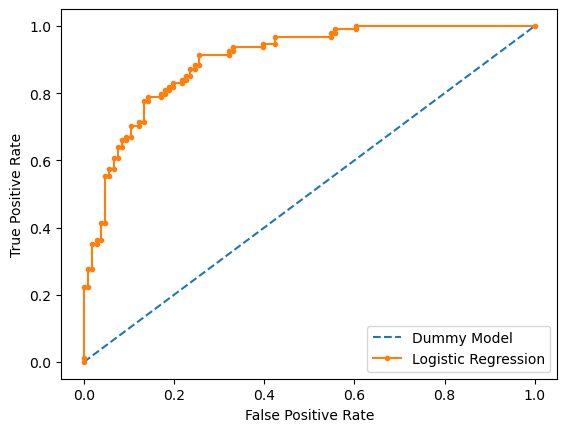

In [113]:
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
plt.plot(model_fpr,model_tpr,marker='.',label='Logistic Regression')
## Axis Label 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
## Show legend 
plt.legend()
## Show Plot
plt.show()

In [114]:
thresholds

array([           inf, 9.99746470e-01, 9.57758694e-01, 9.56874850e-01,
       9.44692000e-01, 9.40798698e-01, 9.27422045e-01, 9.25366478e-01,
       9.24251909e-01, 9.23295200e-01, 8.99543928e-01, 8.97529800e-01,
       8.48175830e-01, 8.43011275e-01, 8.23266961e-01, 8.22695247e-01,
       8.16564248e-01, 8.09487362e-01, 8.04548646e-01, 7.94948723e-01,
       7.81078622e-01, 7.60448777e-01, 7.60342634e-01, 7.51848883e-01,
       7.40369385e-01, 7.33284233e-01, 7.29232595e-01, 7.27168990e-01,
       6.55452536e-01, 6.52640043e-01, 6.46430871e-01, 6.30467947e-01,
       6.20343499e-01, 6.18363410e-01, 6.01171149e-01, 5.99570512e-01,
       5.57425863e-01, 5.47504289e-01, 5.39096397e-01, 5.01053464e-01,
       4.97145320e-01, 4.94836261e-01, 4.90732140e-01, 4.84229485e-01,
       4.72109796e-01, 4.60005139e-01, 4.58293698e-01, 4.49274042e-01,
       4.08140395e-01, 3.18539320e-01, 3.05995455e-01, 2.96107469e-01,
       2.84186360e-01, 2.12193211e-01, 2.02795674e-01, 1.77126313e-01,
      

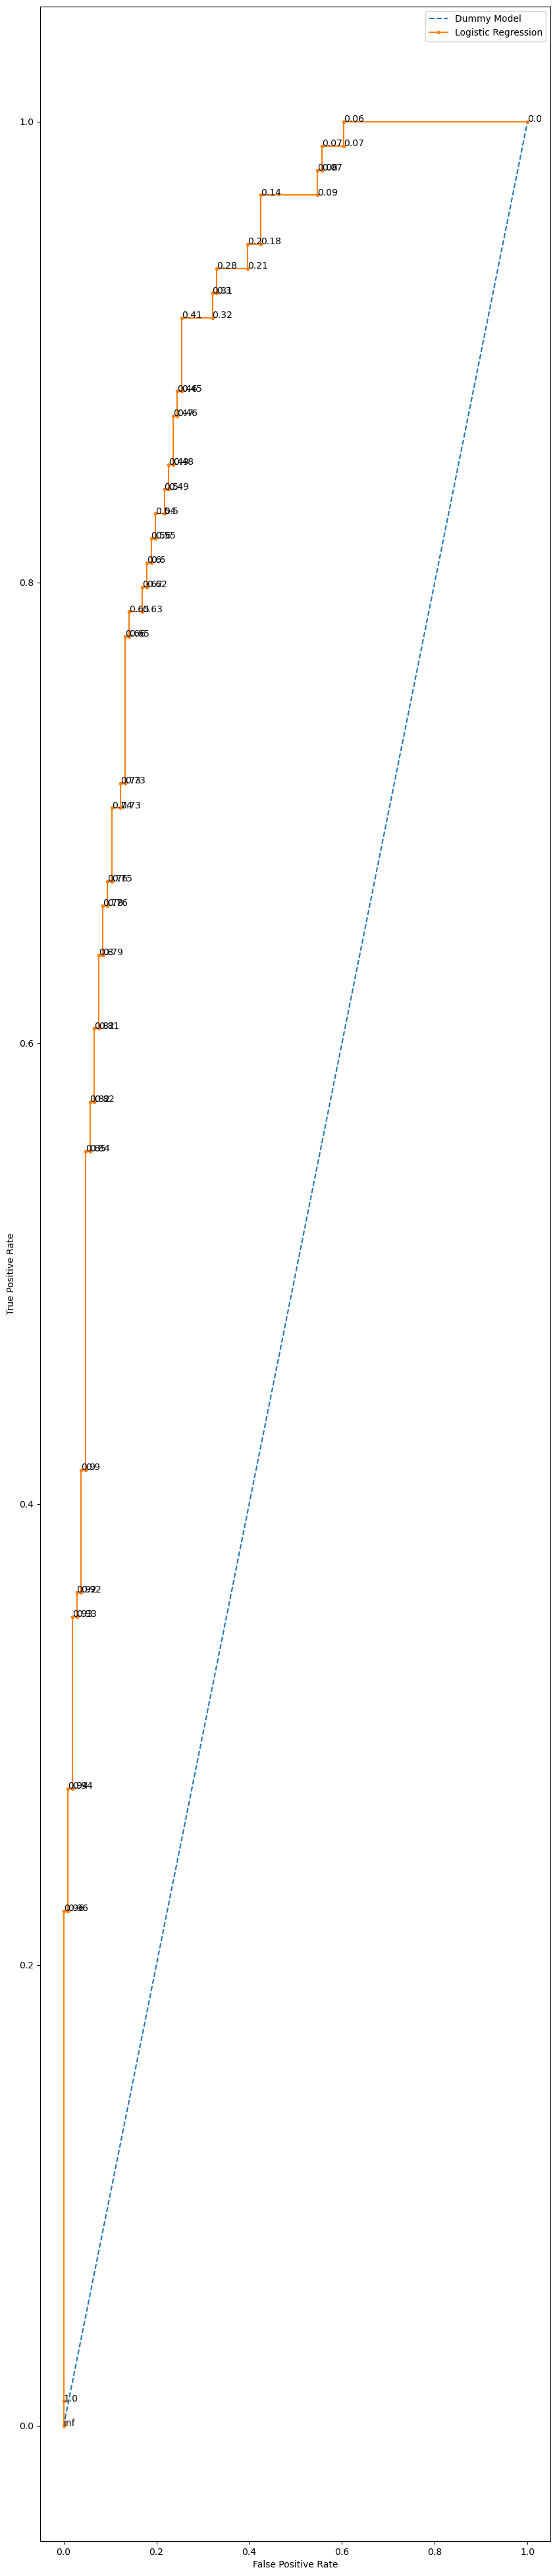

In [115]:
fig = plt.figure(figsize=(10,50))
ax = fig.add_subplot(111)
ax.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
ax.plot(model_fpr,model_tpr,marker='.',label='Logistic Regression')
for xyz in zip(model_fpr,model_tpr,thresholds):
    ax.annotate('%s' % np.round(xyz[2],2),xy=(xyz[0],xyz[1]))
## Axis Label 
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
## Show legend 
ax.legend()
## Show Plot
plt.show()